# Predicting the chance of Survival

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gender_df = pd.read_csv('gender_submission.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
gender_df

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
train_df.isnull().sum()

In [ ]:
test_df.isnull().sum()

In [ ]:
#since majority of cabin are null, the column can be dropped
train_df.drop('Cabin', axis=1,inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [9]:
full_df = train_df.append(test_df, ignore_index=True)

In [10]:
full_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [11]:
# t_df = pd.DataFrame({'s': [1,0,0,np.nan,0], 'age':[1,0, 1,1,0], 'see':[2,5,6,0,0]})
# g_df = pd.DataFrame({'s':[0,0,1], 'see':[1,2,3]})
# c = t_df.append(g_df, ignore_index=True)

C:\Users\mathe\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


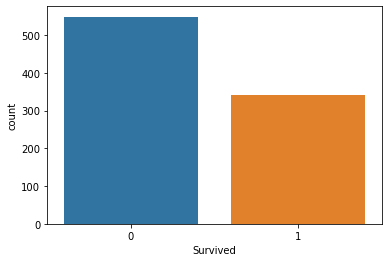

In [12]:
# No of survived
sns.countplot(train_df.Survived)
plt.show()

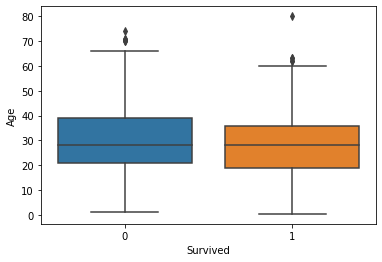

In [13]:
#Age and survived
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.show()

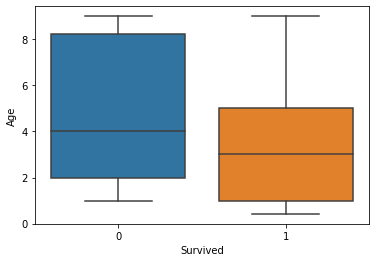

In [14]:
#graph of children survived
sns.boxplot(x='Survived', y='Age', data=train_df[train_df.Age<10])
plt.show()

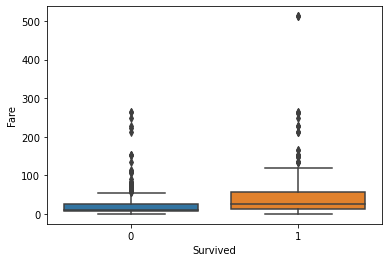

In [15]:
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.show()

C:\Users\mathe\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


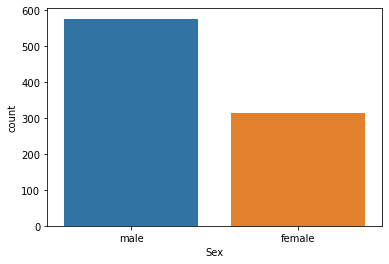

In [16]:
sns.countplot(train_df.Sex)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

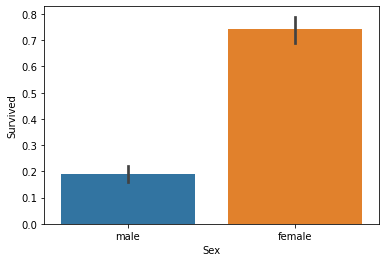

In [17]:
sns.barplot(x='Sex', y='Survived', data=train_df)

C:\Users\mathe\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


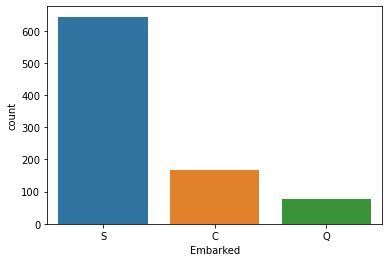

In [18]:
sns.countplot(train_df.Embarked)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

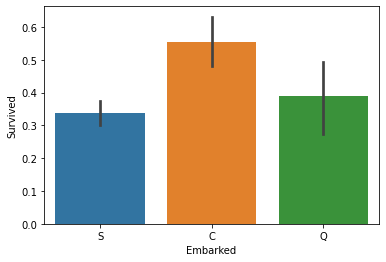

In [19]:
sns.barplot(x='Embarked', y='Survived', data=train_df)

In [20]:
full_df['Title'] = full_df.Name.str.extract(r'([A-Za-z]+)\.', expand=False)

In [21]:
full_df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Countess      1
Dona          1
Don           1
Capt          1
Mme           1
Lady          1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [22]:
common_title = ['Mr', 'Miss', 'Mrs', 'Master']
full_df.loc[full_df.Title.isin(['Mlle', 'Ms', 'Mme']), ['Title']]='Miss'
full_df.loc[full_df.Title.isin(['Lady']),['Title']]='Mrs'
full_df.loc[full_df.Title.isin(['Sir', 'Major']),['Title']]='Mr'
full_df.loc[~full_df.Title.isin(common_title),['Title']]='Others'

In [23]:
full_df.Title.value_counts()

Mr        760
Miss      265
Mrs       198
Master     61
Others     25
Name: Title, dtype: int64

In [24]:
train = full_df[:len(train_df)]
test = full_df[len(train_df):]

<AxesSubplot:xlabel='Title', ylabel='Survived'>

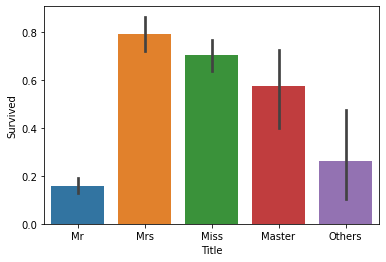

In [25]:
sns.barplot(x='Title', y='Survived', data=train)

In [26]:
age_median = train.groupby('Title')['Age'].median()

In [27]:
datas = [train, test]

In [28]:
age_median

Title
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Others    46.5
Name: Age, dtype: float64

In [29]:
#updating unfilled age based on title
for data in datas:
    for title in age_median.index:
        data['Age'][(data.Age.isnull()) & (data.Title==title)] = age_median[title]
    

<ipython-input-29-7ad97ddf5ffc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][(data.Age.isnull()) & (data.Title==title)] = age_median[title]
C:\Users\mathe\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [30]:
#updating empty Embarked column with maximum occured embarked value
max_embarked = train.Embarked.mode().values[0]
for data in datas:
    data['Embarked'][data.Embarked.isnull()] = max_embarked


<ipython-input-30-9befce965813>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'][data.Embarked.isnull()] = max_embarked


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [32]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Others
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,Miss
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [33]:
for data in datas:
    data['Sex'] = data.Sex.map({'female':0, 'male':1})

<ipython-input-33-40c836aa137a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data.Sex.map({'female':0, 'male':1})


In [34]:
emb_dict = {}
for i, val in enumerate(train.Embarked.value_counts().index):
    emb_dict[val] = i


for data in datas:
    data['Embarked'] = data.Embarked.map(emb_dict)

<ipython-input-34-336b0db0a71a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data.Embarked.map(emb_dict)


In [35]:
emb_dict

{'S': 0, 'C': 1, 'Q': 2}

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

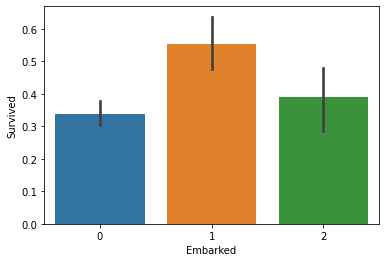

In [36]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [37]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    object 
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [38]:
for data in datas:
    data['Family'] = data['Parch'] + data['SibSp']
    data['Alone'] = data['Family'].apply(lambda x: 0 if x > 0 else 1)
    data['Child'] = data['Age'].apply(lambda x:1 if x<12 else 0)

<ipython-input-38-b55e677f525a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Family'] = data['Parch'] + data['SibSp']
<ipython-input-38-b55e677f525a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Alone'] = data['Family'].apply(lambda x: 0 if x > 0 else 1)
<ipython-input-38-b55e677f525a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

<AxesSubplot:xlabel='Child', ylabel='Survived'>

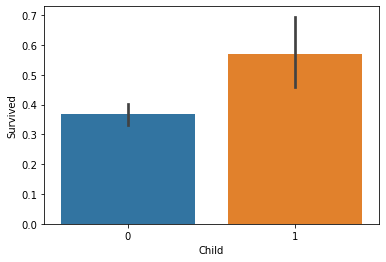

In [39]:
sns.barplot(x='Child',y='Survived', data=train)

In [40]:
train['Alone'].value_counts()

1    537
0    354
Name: Alone, dtype: int64

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

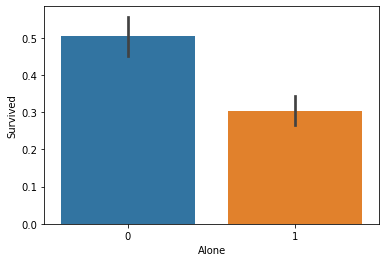

In [41]:
sns.barplot(x='Alone', y='Survived', data=train)

In [42]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,Alone,Child
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,Mr,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,Mrs,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,Miss,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,Mrs,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,Mr,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,Others,0,1,0
887,888,1.0,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0,Miss,0,1,0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,0,Miss,3,0,0
889,890,1.0,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,Mr,0,1,0


In [43]:
#grouping on the basis of age
for data in datas:
    data['Age_grp'] = pd.qcut(data.Age, 5, labels=[0,1,2,3,4])

<ipython-input-43-a54b7a1f4575>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_grp'] = pd.qcut(data.Age, 5, labels=[0,1,2,3,4])
<ipython-input-43-a54b7a1f4575>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_grp'] = pd.qcut(data.Age, 5, labels=[0,1,2,3,4])


<AxesSubplot:xlabel='Age_grp', ylabel='Survived'>

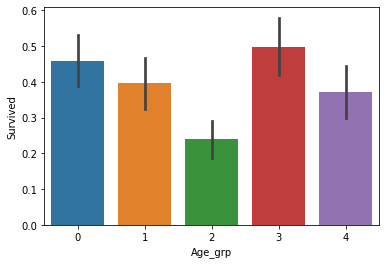

In [44]:
sns.barplot(x='Age_grp', y="Survived", data=train)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

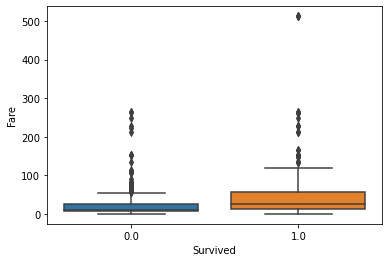

In [45]:
sns.boxplot(x='Survived', y='Fare', data=train)

In [46]:
fvalue = train.Fare.nlargest().values[-1]
for data in datas:
    data['Fare'][data.Fare==data.Fare.max()] = fvalue

<ipython-input-46-e32f8a9190da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][data.Fare==data.Fare.max()] = fvalue
C:\Users\mathe\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-46-e32f8a9190da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][data.Fare==data.Fare.max()] = fvalue
C:\Use

In [47]:
for data in datas:
    data['Fare_grp'] = pd.qcut(data.Fare, 5, labels=[0,1,2,3,4])

<ipython-input-47-a72e93e59326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_grp'] = pd.qcut(data.Fare, 5, labels=[0,1,2,3,4])
<ipython-input-47-a72e93e59326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_grp'] = pd.qcut(data.Fare, 5, labels=[0,1,2,3,4])


<AxesSubplot:xlabel='Fare_grp', ylabel='Survived'>

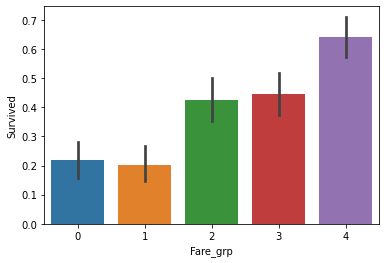

In [48]:
sns.barplot(x='Fare_grp', y='Survived', data=train)

In [49]:
test.Fare.fillna(test.Fare.median(), inplace=True)

C:\Users\mathe\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [50]:
title_dict = dict(zip(train.Title.unique(), np.arange(0,len(train.Title.unique()))))
# for data in datas:
# train.Title.unique()


In [51]:
for data in datas:
    data['Title'] = data['Title'].map(title_dict)

<ipython-input-51-287d0050f012>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].map(title_dict)


In [52]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,Alone,Child,Age_grp,Fare_grp
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1,1,0,0,3,4
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2,0,1,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1,1,0,0,3,4
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,4,0,1,0,2,2
887,888,1.0,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0,2,0,1,0,0,3
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,0,2,3,0,0,1,3
889,890,1.0,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,0,0,1,0,1,3


In [53]:
x_train = train.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Age', 'Fare', 'Ticket', 'Family'], axis=1)
x_test = test.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Age', 'Fare', 'Ticket', 'Family'], axis=1)
y_train = train['Survived']

In [54]:
x_train

,Pclass,Sex,Embarked,Title,Alone,Child,Age_grp,Fare_grp
0,3,1,0,0,0,0,1,0
1,1,0,1,1,0,0,3,4
2,3,0,0,2,1,0,1,1
3,1,0,0,1,0,0,3,4
4,3,1,0,0,1,0,3,1
...,...,...,...,...,...,...,...,...
886,2,1,0,4,1,0,2,2
887,1,0,0,2,1,0,0,3
888,3,0,0,2,0,0,1,3
889,1,1,1,0,1,0,1,3


In [55]:

    
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
params = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [3, 5, 7, 8]}]

In [56]:
clf = GridSearchCV(pipe, params, cv=5, verbose=0)

In [57]:
model = clf.fit(x_train, y_train)

In [58]:
print(model.best_params_)
print(model.best_score_)

{'classifier': RandomForestClassifier(max_features=3, n_estimators=1000), 'classifier__max_features': 3, 'classifier__n_estimators': 1000}
0.8204255853367648


In [59]:
bmodel = model.best_estimator_.fit(x_train, y_train)

In [60]:
bmodel.named_steps["classifier"]

RandomForestClassifier(max_features=3, n_estimators=1000)

<AxesSubplot:xlabel='feature', ylabel='importance'>

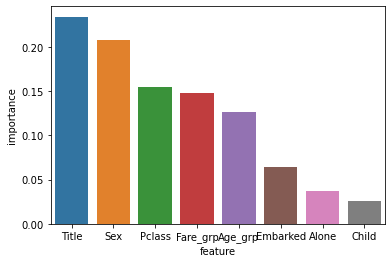

In [61]:
cls = bmodel.named_steps["classifier"]
importance = pd.DataFrame({"feature":x_train.columns, "importance":np.round(cls.feature_importances_, 3)})
importance = importance.sort_values("importance", ascending=False)
sns.barplot(x='feature', y='importance', data=importance)

In [62]:
x_train = x_train.drop(['Embarked', 'Alone', 'Child'], axis=1)
x_test = x_test.drop(['Embarked', 'Alone', 'Child'], axis=1)

In [63]:
new_model = bmodel.named_steps["classifier"].fit(x_train,y_train)

In [64]:
pred = new_model.predict(x_test)

In [65]:
csv_df = pd.DataFrame({"PassengerId":test.PassengerId,"Survived":pred})

In [66]:
csv_df

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,1.0
...,...,...
1304,1305,0.0
1305,1306,1.0
1306,1307,0.0
1307,1308,0.0


In [67]:
csv_df.to_csv("prediction1.csv")